## Import Package

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib.cm import viridis
import seaborn as sns
import scipy
import statsmodels.api as sm
from scipy.stats import binom, bernoulli, norm, uniform, gamma
import scipy.stats.distributions as dist

## Preprocessing Dataset

In [100]:
# Membuka File dataset dengan Pandas
df = pd.read_csv('nyc-rolling-sales.csv', index_col='Unnamed: 0')
pd.set_option('display.max_columns', None)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [101]:
# Cek jumlah baris dan kolom
row, col = df.shape

print('Jumlah Baris : ', row)
print('Jumlah Kolom : ', col)

Jumlah Baris :  84548
Jumlah Kolom :  21


In [102]:
# Cek tipe data pada masing kolom
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 84548 entries, 4 to 8413
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null  int6

In [103]:
# Cek nunique
df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [104]:
# CeK Jumlah Missing Value pada masing-masing feature yang ada
cek_missing_value = df.isna().sum().reset_index()

cek_missing_value.columns = ['Kolom', 'Jumlah Missing Value']

cek_missing_value

# Tidak ada Missing Value pada semua kolom

,Kolom,Jumlah Missing Value
0,BOROUGH,0
1,NEIGHBORHOOD,0
2,BUILDING CLASS CATEGORY,0
3,TAX CLASS AT PRESENT,0
4,BLOCK,0
5,LOT,0
6,EASE-MENT,0
7,BUILDING CLASS AT PRESENT,0
8,ADDRESS,0
9,APARTMENT NUMBER,0


In [105]:
# Cek jumlah Duplikat yang sama persis
df[df.duplicated(keep=False)].tail(10)

# Ada banyak data duplikat yang sama persis

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8074,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,748,18,,A2,586 WOOLLEY AVENUE,,10314,1,0,1,5000,1080,1955,1,A2,-,2017-02-07 00:00:00
8075,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,748,18,,A2,586 WOOLLEY AVENUE,,10314,1,0,1,5000,1080,1955,1,A2,-,2017-02-07 00:00:00
8157,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,735,24,,B9,492 INGRAM AVENUE,,10314,2,0,2,2200,1440,1970,1,B9,-,2016-09-08 00:00:00
8158,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,735,24,,B9,492 INGRAM AVENUE,,10314,2,0,2,2200,1440,1970,1,B9,-,2016-09-08 00:00:00
8184,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,790,80,,B2,267 CRAFTON AVENUE,,10314,2,0,2,4320,2288,1970,1,B2,-,2017-01-10 00:00:00
8185,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,790,80,,B2,267 CRAFTON AVENUE,,10314,2,0,2,4320,2288,1970,1,B2,-,2017-01-10 00:00:00
8211,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,1975,513,,B2,180 WALCOTT AVENUE,,10314,2,0,2,4100,2010,1975,1,B2,-,2017-07-03 00:00:00
8212,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,1975,513,,B2,180 WALCOTT AVENUE,,10314,2,0,2,4100,2010,1975,1,B2,-,2017-07-03 00:00:00
8310,5,WOODROW,01 ONE FAMILY DWELLINGS,1,6969,20,,A5,1045 SHELDON AVENUE,,10309,1,0,1,2773,1650,1999,1,A5,560000,2016-09-07 00:00:00
8311,5,WOODROW,01 ONE FAMILY DWELLINGS,1,6969,20,,A5,1045 SHELDON AVENUE,,10309,1,0,1,2773,1650,1999,1,A5,560000,2016-09-07 00:00:00


In [106]:
df.isnull().sum() * 100 / len(df)

BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
EASE-MENT                         0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

In [107]:
# Menggambil seluruh kolom
kolom = df.columns.tolist()

# Menghapus data duplikat yang sama persis
df = df.drop_duplicates(subset=kolom)

# Cek hasil hapus data duplikat yang sama persis
df[df.duplicated(keep=False)]

# Data sudah bersih dari duplikat yang sama persis

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [108]:
def cek_angka(value):
    if str(value).isnumeric():
        return True
    else:
        return False


cek_non_angka_value = df[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
                          'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']].applymap(cek_angka)

cek_non_angka_value.apply(pd.Series.value_counts)

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
True,83783,83783,83783,83783,83783,83783,83783,83783,83783


In [109]:
def cek_string(value):
    if isinstance(value, str) == True and value != True and value != False and value != None:
        return True
    elif isinstance(value, float):
        return False
    else:
        return False


cek_non_string = df[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT',
                     'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']].applymap(cek_string)

cek_non_string.apply(pd.Series.value_counts)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
True,83783,83783,83783,83783,83783,83783,83783,83783,83783,83783,83783,83783


In [110]:
# Statistik
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000
mean,2.999308,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,1789.814318,1.654035
std,1.288668,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,536.565051,0.814588
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [111]:
# Mengkonversi kolom 'SALE PRICE' menjadi tipe data numerik dengan mengganti nilai yang tidak valid menjadi NaN
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Mengganti nilai-nilai NaN dengan 0
# df['SALE PRICE'].fillna(0, inplace=True)

In [112]:
# Rubah Value yang ada di BOROUGHT
df['BOROUGH'][df['BOROUGH'] == 1] = 'MANHATTAN'
df['BOROUGH'][df['BOROUGH'] == 2] = 'BRONX'
df['BOROUGH'][df['BOROUGH'] == 3] = 'BROOKLYN'
df['BOROUGH'][df['BOROUGH'] == 4] = 'QUEENS'
df['BOROUGH'][df['BOROUGH'] == 5] = 'STATEN ISLAND'

C:\Users\Ahmad Fadillah\AppData\Local\Temp\ipykernel_10112\1994151155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'][df['BOROUGH'] == 1] = 'MANHATTAN'


In [113]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
5,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
6,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
7,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
8,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00


Contoh pertanyaannya bisa berupa:
1. Apakah terdapat perbedaan unit terjual antara properti yang dibangun pada tahun 1900-2000 dengan tahun 2001 dan seterusnya?
2. Apakah terdapat perbedaan unit yang terjual berdasarkan kategori bangunan?
3. Apa yang dapat Anda temukan tentang real estat Kota New York dengan melihat catatan transaksi mentah selama satu tahun? Bisakah Anda melihat tren di pasar?

## Measure of Central Tendency

### Mean
Pertanyaan : Bagaimana rata-rata(Mean) penjualan dari rumah dengan pembangunan tahun 2014-2015 dari berbagai wilayah ?

Note : Tidak termasuk "SALE PRICE" yang bernilai Nan. Mean hanya rumah yang berhasil terjual

In [114]:
filter_2014_2015 = df[(df['YEAR BUILT'] == 2014) | (df['YEAR BUILT'] == 2015)]
temp_Mean = filter_2014_2015.groupby(['BOROUGH', 'YEAR BUILT'])[
    'SALE PRICE'].agg([('MEAN SALE PRICE', np.nanmean)])

temp_Mean = temp_Mean.reset_index()

temp_Mean['BOROUGH YEAR BUILT'] = temp_Mean['BOROUGH'].astype(
    str) + ' ' + temp_Mean['YEAR BUILT'].astype(str)

temp_Mean.drop(columns=['BOROUGH', 'YEAR BUILT'], inplace=True)

temp_Mean

,MEAN SALE PRICE,BOROUGH YEAR BUILT
0,4.101713e+05,BRONX 2014
1,5.621578e+05,BRONX 2015
2,1.601230e+06,BROOKLYN 2014
3,1.355759e+06,BROOKLYN 2015
4,5.288897e+06,MANHATTAN 2014
5,6.940956e+06,MANHATTAN 2015
6,1.222384e+06,QUEENS 2014
7,9.585279e+05,QUEENS 2015
8,6.997843e+05,STATEN ISLAND 2014
9,5.912035e+05,STATEN ISLAND 2015


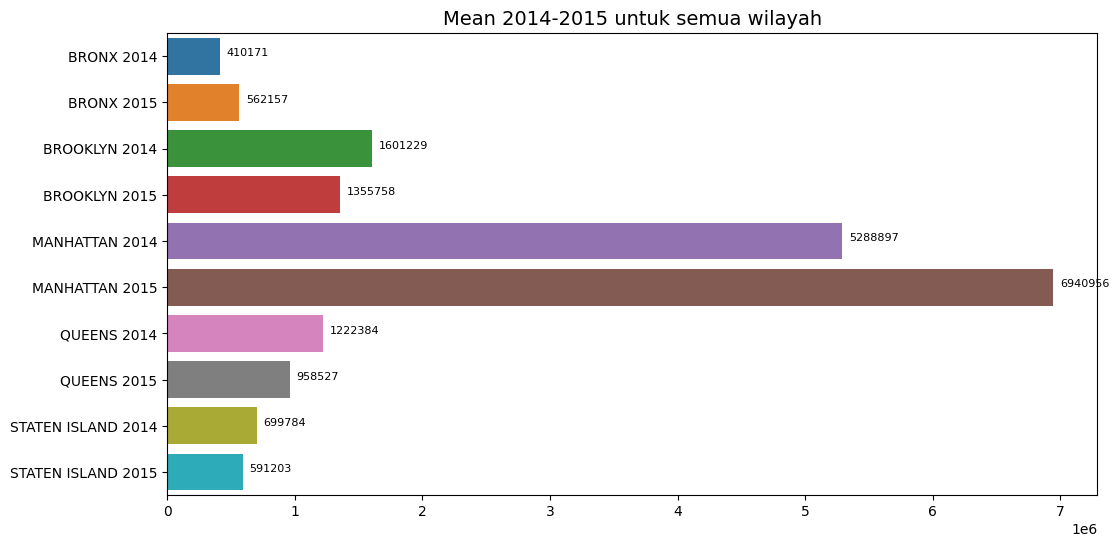

In [115]:
# Membuat grafik batang horizontal
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='MEAN SALE PRICE',
                   y='BOROUGH YEAR BUILT',
                   data=temp_Mean)

ax.set_title('Mean 2014-2015 untuk semua wilayah', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)

# Menampilkan label pada batang
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_width())}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                fontsize=8,
                color='black')

plt.show()

### Median
Pertanyaan : Bagaimana median dari penjualan dari rumah dengan pembangunan tahun 2014-2015 dari berbagai wilayah ?

Note :  "SALE PRICE" yang bernilai Nan tidak terpengaruh 

In [116]:
filter_2014_2015 = df[(df['YEAR BUILT'] == 2014) | (df['YEAR BUILT'] == 2015)]
temp_Median = filter_2014_2015.groupby(['BOROUGH', 'YEAR BUILT'])[
    'SALE PRICE'].agg([('MEDIAN SALE PRICE', np.nanmedian)])

temp_Median = temp_Median.reset_index()

temp_Median['BOROUGH YEAR BUILT'] = temp_Median['BOROUGH'].astype(
    str) + ' ' + temp_Median['YEAR BUILT'].astype(str)

temp_Median.drop(columns=['BOROUGH', 'YEAR BUILT'], inplace=True)

temp_Median

,MEDIAN SALE PRICE,BOROUGH YEAR BUILT
0,518034.0,BRONX 2014
1,580402.0,BRONX 2015
2,879250.0,BROOKLYN 2014
3,889745.0,BROOKLYN 2015
4,3683519.0,MANHATTAN 2014
5,4607581.0,MANHATTAN 2015
6,1009197.0,QUEENS 2014
7,767493.0,QUEENS 2015
8,624000.0,STATEN ISLAND 2014
9,500916.0,STATEN ISLAND 2015


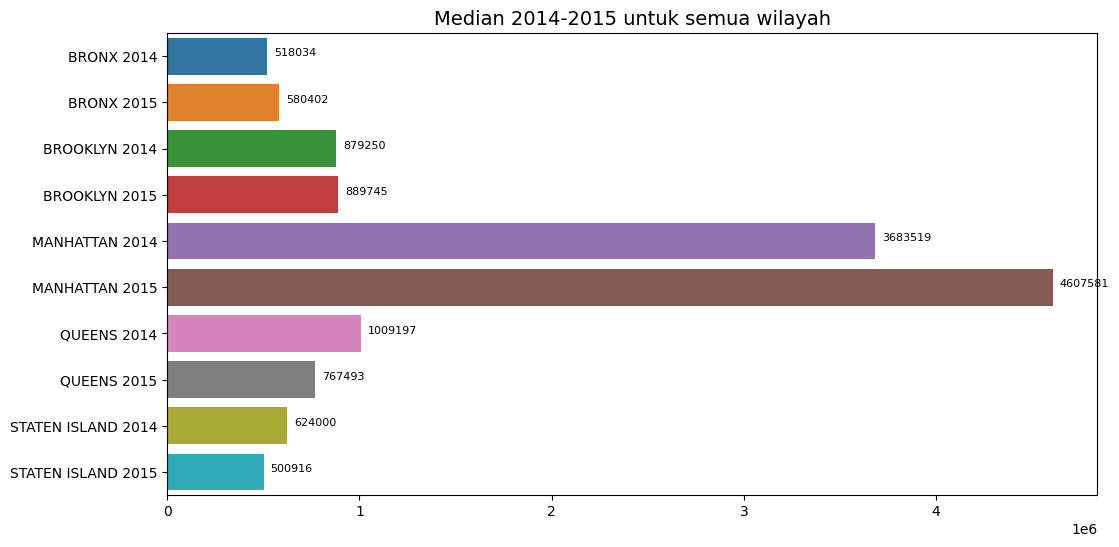

In [117]:
# Membuat grafik batang horizontal
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='MEDIAN SALE PRICE',
                   y='BOROUGH YEAR BUILT',
                   data=temp_Median)

ax.set_title('Median 2014-2015 untuk semua wilayah', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)

# Menampilkan label pada batang
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_width())}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                fontsize=8,
                color='black')

plt.show()

### Modus
Pertanyaan : Bagaimana Mode/Modus dari YEAR BUILT, BUILDING CLASS AT PRESENT, dan TAX CLASS AT PRESENT ?

In [118]:
columns = ['BUILDING CLASS AT PRESENT',
           'TAX CLASS AT PRESENT', 'BUILDING CLASS CATEGORY', 'ADDRESS', 'SALE DATE']
modes = [df[col].mode().values[0] for col in columns]
counts = [np.sum(df[col] == mode) for col, mode in zip(columns, modes)]

# Membuat DataFrame hasil
temp_Modus = pd.DataFrame({
    'Kolom': columns,
    'Modus': modes,
    'TOTAL': counts})

# Mengubah kolom 'TOTAL' menjadi float
temp_Modus['TOTAL'] = temp_Modus['TOTAL'].astype(float)

temp_Modus['KOLOM MODUS'] = temp_Modus['Kolom'].astype(
    str) + ', ' + temp_Modus['Modus'].astype(str)

temp_Modus.drop(columns=['Kolom', 'Modus'], inplace=True)
temp_Modus

,TOTAL,KOLOM MODUS
0,12637.0,"BUILDING CLASS AT PRESENT, D4"
1,38329.0,"TAX CLASS AT PRESENT, 1"
2,18107.0,"BUILDING CLASS CATEGORY, 01 ONE FAMILY DWELLIN..."
3,210.0,"ADDRESS, 131-05 40TH ROAD"
4,541.0,"SALE DATE, 2017-06-29 00:00:00"


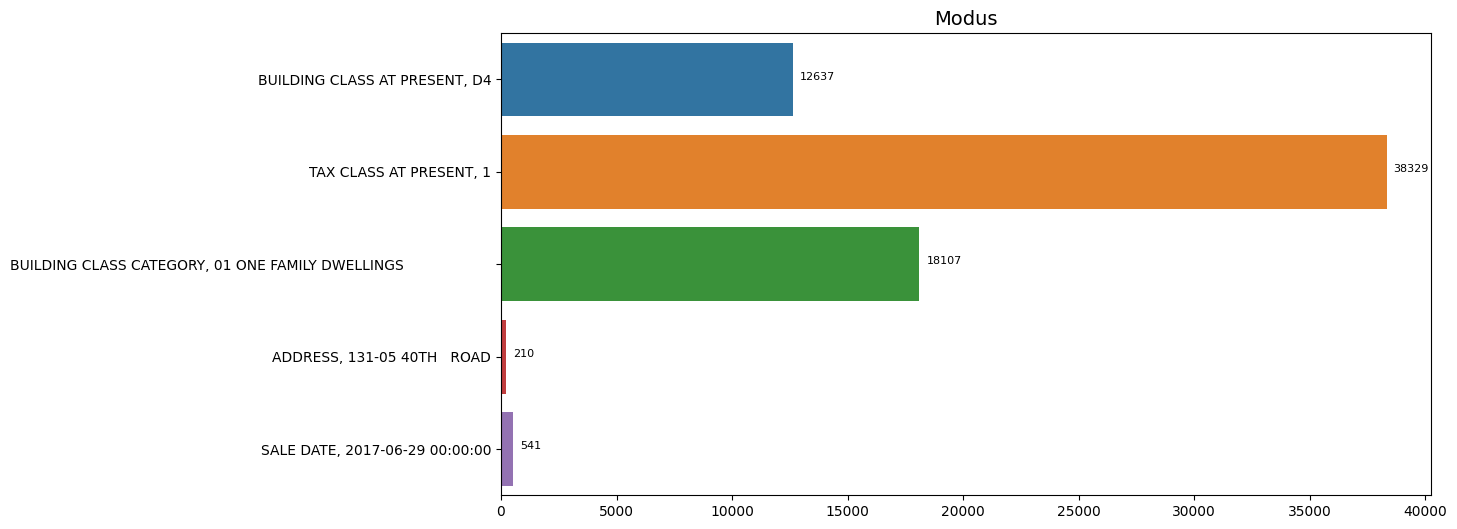

In [119]:
# Membuat grafik batang horizontal
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='TOTAL',
                   y='KOLOM MODUS',
                   data=temp_Modus)

ax.set_title('Modus', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)

# Menampilkan label pada batang
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_width())}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                fontsize=8,
                color='black')

plt.show()

## Measure of Spread

### Range
Pertanyaan: Big 5 Range, SALE PRICE pada YEAR BUILT tahun 2014-2015 ?

Note : Berdasar google harga rumah minimum/ standar berada $50000, berarti dibawah itu kemungkinan terjadi error/salah input atau scam. jadi minimum di set $50000

In [120]:
# Set minimum SALE PRICE >= 50_000 dan hanya berada antara tahun 2014-2015
temp_Range = df[(df['SALE PRICE'] >= 50_000) & (
    (df['YEAR BUILT'] == 2014) | (df['YEAR BUILT'] == 2015))]

temp_Range = temp_Range.groupby(['BOROUGH', 'YEAR BUILT'])[
    'SALE PRICE'].agg([('RANGE', np.ptp)])

temp_Range = temp_Range.reset_index()

temp_Range['BOROUGH YEAR BUILT'] = temp_Range['BOROUGH'].astype(
    str) + ', ' + temp_Range['YEAR BUILT'].astype(str)

temp_Range.drop(columns=['YEAR BUILT', 'BOROUGH'], inplace=True)

temp_Range

,RANGE,BOROUGH YEAR BUILT
0,450489.0,"BRONX, 2014"
1,2975974.0,"BRONX, 2015"
2,87934090.0,"BROOKLYN, 2014"
3,10587050.0,"BROOKLYN, 2015"
4,203286960.0,"MANHATTAN, 2014"
5,173543700.0,"MANHATTAN, 2015"
6,7085497.0,"QUEENS, 2014"
7,22930000.0,"QUEENS, 2015"
8,792352.0,"STATEN ISLAND, 2014"
9,1438687.0,"STATEN ISLAND, 2015"


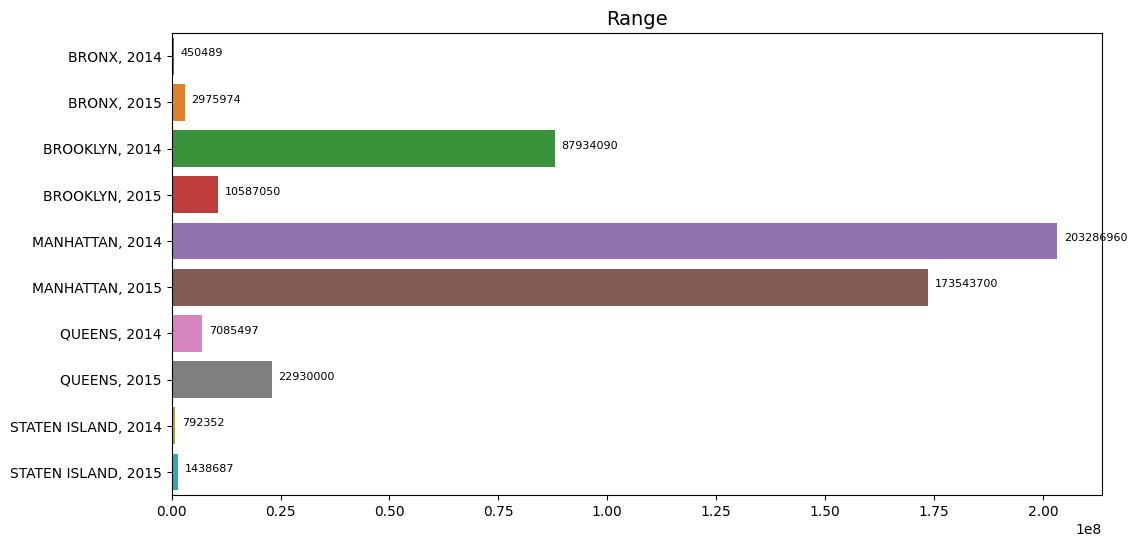

In [121]:
# Membuat grafik batang horizontal
fig, ax = plt.subplots(figsize=(12, 6))

# Menggunakan barplot dari Seaborn
bars = sns.barplot(x='RANGE',
                   y='BOROUGH YEAR BUILT',
                   data=temp_Range)

ax.set_title('Range', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)

# Menampilkan label pada batang x dengan nilai range
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_width())}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                fontsize=8,
                color='black')

plt.show()

### Variance
Pertanyaan: Bagaimana Variance dari SALE PRICE pada harga lebih dari $50000 pada tahun 2014-2015 dari berbagai wilayah ?

Note : Variance menggunakan ddof = 1

In [122]:
# Set minimum SALE PRICE >= 50_000 dan hanya berada antara tahun 2014-2015
temp_Variance = df[(df['SALE PRICE'] >= 50_000) & (
    (df['YEAR BUILT'] == 2014) | (df['YEAR BUILT'] == 2015))]

temp_Variance = df.groupby(['BOROUGH', 'YEAR BUILT'])['SALE PRICE'].var(ddof=1)

temp_Variance = temp_Variance.reset_index()

temp_Variance.rename(columns={'SALE PRICE': 'VARIANCE'}, inplace=True)

temp_Variance = temp_Variance.sort_values(by='VARIANCE', ascending=False)

temp_Variance = temp_Variance.head(10)

temp_Variance['BOROUGH YEAR BUILT'] = temp_Variance['BOROUGH'].astype(
    str) + ', ' + temp_Variance['YEAR BUILT'].astype(str)

temp_Variance.drop(columns=['YEAR BUILT', 'BOROUGH'], inplace=True)

temp_Variance

,VARIANCE,BOROUGH YEAR BUILT
355,6.774737e+16,"MANHATTAN, 1966"
372,1.142065e+16,"MANHATTAN, 1983"
358,6.635250e+15,"MANHATTAN, 1969"
376,4.724302e+15,"MANHATTAN, 1987"
364,4.031170e+15,"MANHATTAN, 1975"
310,3.953044e+15,"MANHATTAN, 1918"
81,2.468329e+15,"BRONX, 1977"
430,2.274575e+15,"QUEENS, 1922"
169,1.271653e+15,"BROOKLYN, 1918"
298,8.707423e+14,"MANHATTAN, 1906"


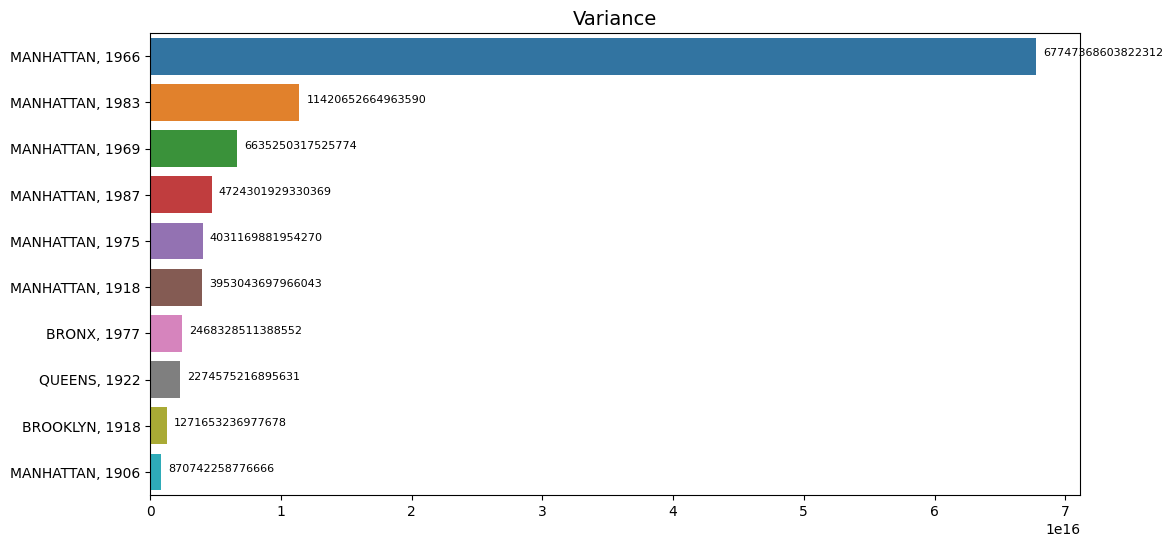

In [123]:
# Membuat grafik batang horizontal
fig, ax = plt.subplots(figsize=(12, 6))

# Menggunakan barplot dari Seaborn
bars = sns.barplot(x='VARIANCE',
                   y='BOROUGH YEAR BUILT',
                   data=temp_Variance)

ax.set_title('Variance', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)

# Menampilkan label pada batang x dengan nilai range
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_width())}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                fontsize=8,
                color='black')

plt.show()

### Standard Deviation
Pertanyaan: Bagaimana Standard Deviation dari SALE PRICE pada harga lebih dari $50000 pada tahun 2014-2015 dari berbagai wilayah ?

Note : Standard Deviation menggunakan ddof = 1

In [124]:
# Set minimum SALE PRICE >= 50_000 dan hanya berada antara tahun 2014-2015
temp_Standard_Deviation = df[(df['SALE PRICE'] >= 50_000) & (
    (df['YEAR BUILT'] == 2014) | (df['YEAR BUILT'] == 2015))]

temp_Standard_Deviation = df.groupby(['BOROUGH', 'YEAR BUILT'])[
    'SALE PRICE'].std(ddof=1)

temp_Standard_Deviation = temp_Standard_Deviation .reset_index()

temp_Standard_Deviation .rename(
    columns={'SALE PRICE': 'STANDARD DEVIATION'}, inplace=True)

temp_Standard_Deviation = temp_Standard_Deviation .sort_values(
    by='STANDARD DEVIATION', ascending=False)

temp_Standard_Deviation = temp_Standard_Deviation .head(10)

temp_Standard_Deviation['BOROUGH YEAR BUILT'] = temp_Standard_Deviation['BOROUGH'].astype(
    str) + ', ' + temp_Standard_Deviation['YEAR BUILT'].astype(str)

temp_Standard_Deviation .drop(columns=['YEAR BUILT', 'BOROUGH'], inplace=True)

temp_Standard_Deviation

,STANDARD DEVIATION,BOROUGH YEAR BUILT
355,2.602832e+08,"MANHATTAN, 1966"
372,1.068675e+08,"MANHATTAN, 1983"
358,8.145705e+07,"MANHATTAN, 1969"
376,6.873356e+07,"MANHATTAN, 1987"
364,6.349149e+07,"MANHATTAN, 1975"
310,6.287324e+07,"MANHATTAN, 1918"
81,4.968228e+07,"BRONX, 1977"
430,4.769251e+07,"QUEENS, 1922"
169,3.566025e+07,"BROOKLYN, 1918"
298,2.950834e+07,"MANHATTAN, 1906"


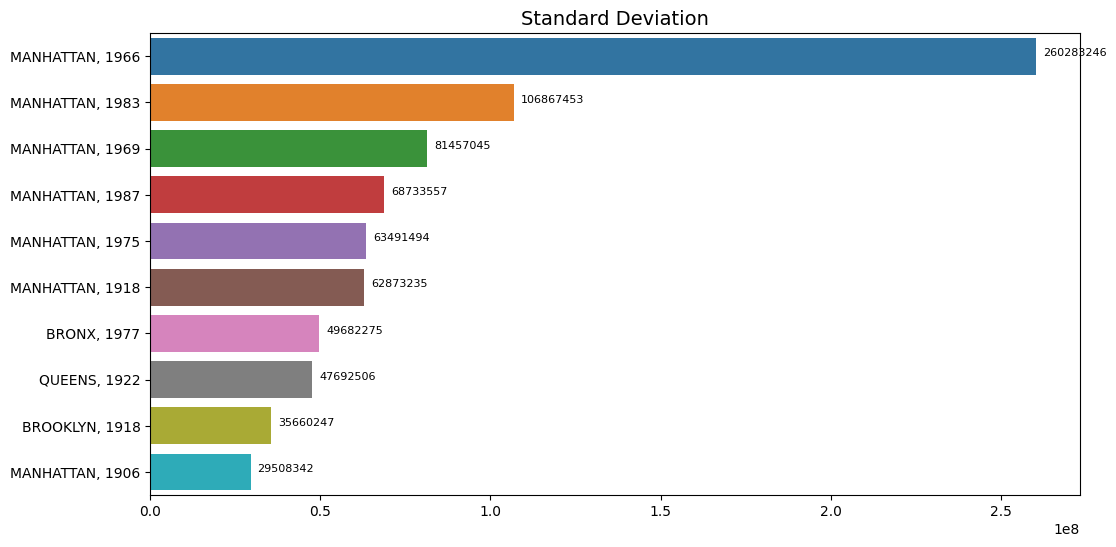

In [125]:
# Membuat grafik batang horizontal
fig, ax = plt.subplots(figsize=(12, 6))

# Menggunakan barplot dari Seaborn
bars = sns.barplot(x='STANDARD DEVIATION',
                   y='BOROUGH YEAR BUILT',
                   data=temp_Standard_Deviation)

ax.set_title('Standard Deviation', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)

# Menampilkan label pada batang x dengan nilai range
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_width())}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                fontsize=8,
                color='black')

plt.show()

## Probability Distribution

### Uniform Distribution

In [126]:
Uniform_1 = df[df['SALE PRICE'] >= 50_000].reset_index()

Uniform_MIN = Uniform_1['SALE PRICE'].min()
Uniform_RANGE = Uniform_1['SALE PRICE'].max() - Uniform_1['SALE PRICE'].min()
Uniform_Data_Points = Uniform_1['SALE PRICE'].count()

Uniform_Distribution = uniform.rvs(loc=Uniform_MIN,
                                   scale=Uniform_RANGE,
                                   size=Uniform_Data_Points)
Uniform_Distribution

array([1.19012605e+09, 1.17297591e+09, 3.25446040e+08, ...,
       3.34452566e+08, 2.05147600e+08, 1.43388757e+09])

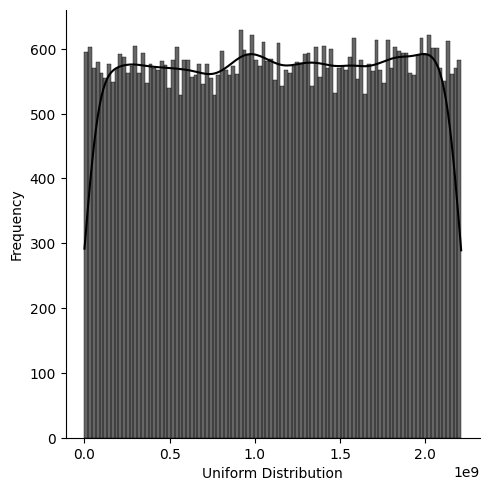

In [157]:
ax = sns.displot(Uniform_Distribution,
                 bins=100,
                 kde=True,
                 alpha=0.6,
                 color='black',
                 label='Data Aktual')

ax.set(xlabel='Uniform Distribution',
       ylabel='Frequency')
plt.show()

### Normal Distribution

In [341]:
Normal_1 = df[(df['SALE PRICE'] >= 50_000) &
              (df['YEAR BUILT'] >= 2013) & (df['YEAR BUILT'] <= 2016)].reset_index()

# Membuat kolom 'EXPENSIVE_CHEAP' dengan 1 untuk Mahal dan 0 untuk Murah
Normal_1['EXPENSIVE CHEAP'] = Normal_1['SALE PRICE'].apply(
    lambda x: 1 if x >= 700_000 else 0)

Normal_1.reset_index(drop=True)

Normal_MEAN = Normal_1['EXPENSIVE CHEAP'].mean()
Normal_STD = Normal_1['EXPENSIVE CHEAP'].std(ddof=1)
Normal_Data_Points = Normal_1['EXPENSIVE CHEAP'].count()

Normal_Distribution = norm.rvs(loc=Normal_MEAN,
                               scale=Normal_STD,
                               size=Normal_Data_Points)

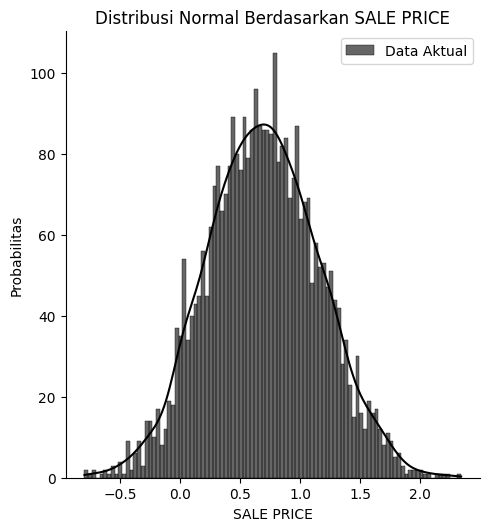

In [342]:
ax = sns.displot(Normal_Distribution,
                 bins=100,
                 kde=True,
                 alpha=0.6,
                 color='black',
                 label='Data Aktual')


plt.xlabel('SALE PRICE')
plt.ylabel('Probabilitas')
plt.title('Distribusi Normal Berdasarkan SALE PRICE')
plt.legend()
plt.show()

### Gamma Distribution

In [199]:
Gamma_1 = df[df['SALE PRICE'] >= 50_000].reset_index()

Gamma_MEAN = Gamma_1['SALE PRICE'].mean()
Gamma_STD = Gamma_1['SALE PRICE'].std(ddof=1)
Gamma_Data_Points = Gamma_1['SALE PRICE'].count()

Gamma_Distribution = gamma.rvs(a=5,
                               size=Gamma_Data_Points)

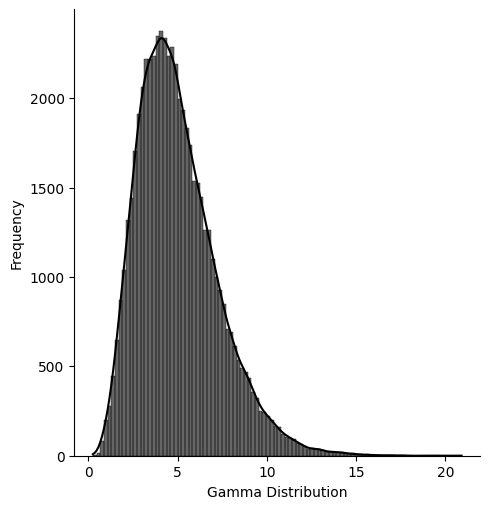

In [201]:
ax = sns.displot(Gamma_Distribution,
                 bins=100,
                 kde=True,
                 alpha=0.6,
                 color='black',
                 label='Data Aktual')

ax.set(xlabel='Gamma Distribution',
       ylabel='Frequency')
plt.show()

### Binomial Distribution

Misalnya, ada tiga kondisi yang perlu dipenuhi untuk memutuskan pembelian properti, dan masing-masing memiliki probabilitas keberhasilan yang berbeda. Bagaimana kita dapat menghitung probabilitas keseluruhan bahwa properti akan dibeli berdasarkan probabilitas masing-masing kondisi?
jika jumlah karyawan yang membantu survei lapangan mencari kesesuain keinginan pembeli ada sebanyak 100.
Kondisi Pembelian:

    Membeli jika harga properti lebih dari $150.000 dan kurang dari $250.000 (Probabilitas = 30%)
    Membeli jika tahun pembangunan (YEAR BUILT) lebih besar dari 2014 (Probabilitas = 25%)
    Membeli jika properti berlokasi di wilayah MANHATTAN (Probabilitas = 35%)


Note : Berdasar google harga rumah minimum/ standar berada $50000, berarti dibawah itu kemungkinan terjadi error/salah input atau scam. jadi minimum di set $50000

In [371]:
def Visualisasi_Binomial(peluang, size_percobaan):
    jumlah_kayawan = 100
    Binomial = binom.rvs(n=jumlah_kayawan,
                         p=peluang,
                         size=size_percobaan)

    ax = sns.displot(Binomial,
                     bins=100,
                     kde=False,
                     color='skyblue',
                     alpha=0.5,
                     linewidth=15)
    ax.set(xlabel='Binomial Distribution',
           ylabel='Frequency')

SyntaxError: non-default argument follows default argument (4060093245.py, line 1)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4701,8342,STATEN ISLAND,WOODROW,01 ONE FAMILY DWELLINGS,1,7106,249,,A5,77 LORRAINE LOOP,,10309,1,0,1,1111,1050,1990,1,A5,162000.0,2017-08-16 00:00:00
4702,8402,STATEN ISLAND,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,244,,B2,19 SPRUCE LANE,,10309,2,0,2,3800,2700,1996,1,B2,168000.0,2017-01-19 00:00:00


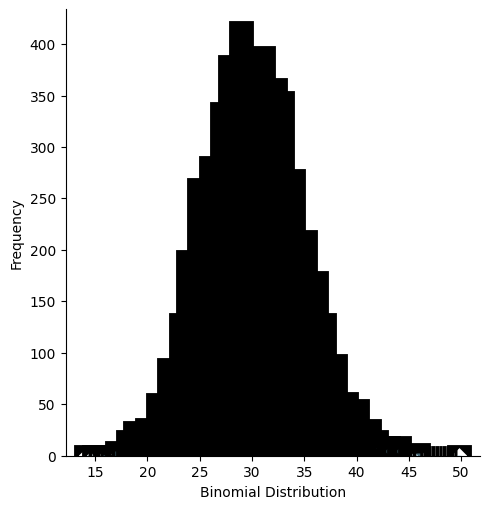

In [366]:
# Jika hanya terpenuhi kondisi 1 maka 30%

Binomial_1 = df[(df['SALE PRICE'] >= 150_000) & (
    df['SALE PRICE'] <= 250_000)].reset_index()
n_percoaan_1 = len(Binomial_1)
peluang_1 = 0.30

Visualisasi_Binomial(peluang_1, n_percoaan_1)
Binomial_1.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
37,5843,STATEN ISLAND,PRINCES BAY,02 TWO FAMILY DWELLINGS,1,6979,64,,B9,97 SANTA MONICA LANE,,10309,2,0,2,2968,1760,2015,1,B9,150000.0,2017-08-09 00:00:00
38,5844,STATEN ISLAND,PRINCES BAY,02 TWO FAMILY DWELLINGS,1,6979,66,,B9,99 SANTA MONICA LANE,,10309,2,0,2,2968,1800,2015,1,B9,150000.0,2017-07-27 00:00:00


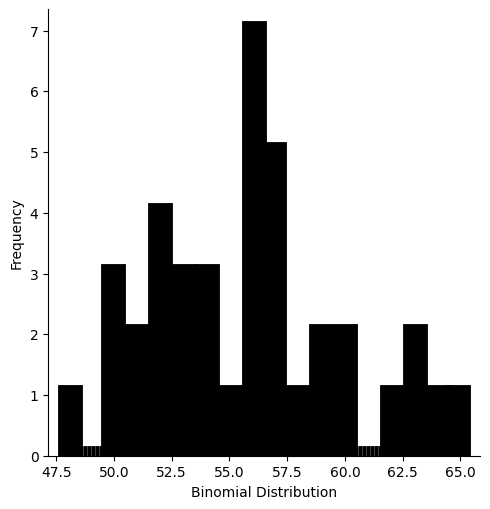

In [367]:
# Jika hanya terpenuhi kondisi 1, 2 maka 55%

Binomial_2 = df[(df['SALE PRICE'] >= 150_000) & (
    df['SALE PRICE'] <= 250_000) & (df['YEAR BUILT'] >= 2014)].reset_index()
n_percoaan_2 = len(Binomial_2)
peluang_2 = 0.55

Visualisasi_Binomial(peluang_2, n_percoaan_2)
Binomial_2.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


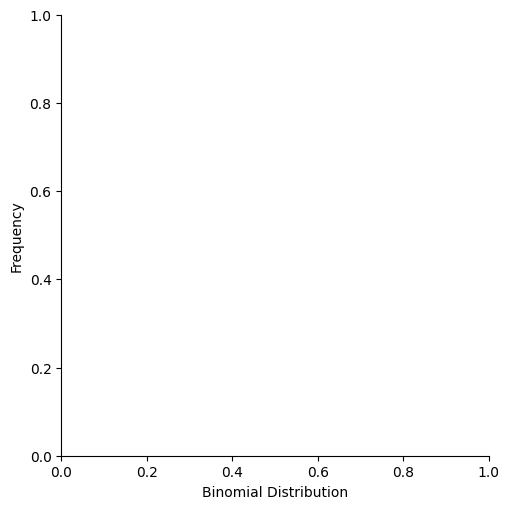

In [368]:
# Jika hanya terpenuhi kondisi 1, 2, 3 maka 90%

Binomial_3 = df[(df['SALE PRICE'] >= 150_000) & (df['SALE PRICE'] <= 250_000) &
                (df['YEAR BUILT'] >= 2014) &
                (df['BOROUGH'] == 'MANHATTAN')].reset_index()
n_percoaan_3 = len(Binomial_3)
peluang_3 = 0.90

Visualisasi_Binomial(peluang_3, n_percoaan_3)
Binomial_3.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
150,18234,MANHATTAN,WASHINGTON HEIGHTS UPPER,10 COOPS - ELEVATOR APARTMENTS,2,2180,614,,D4,"720 FORT WASHINGTON AVEN, 4M",,10040,0,0,0,-,-,1939,2,D4,238000.0,2017-08-18 00:00:00
151,18263,MANHATTAN,WASHINGTON HEIGHTS UPPER,10 COOPS - ELEVATOR APARTMENTS,2,2246,120,,D4,"1803 RIVERSIDE DRIVE, 4L",,10034,0,0,0,-,-,1920,2,D4,250000.0,2017-02-28 00:00:00


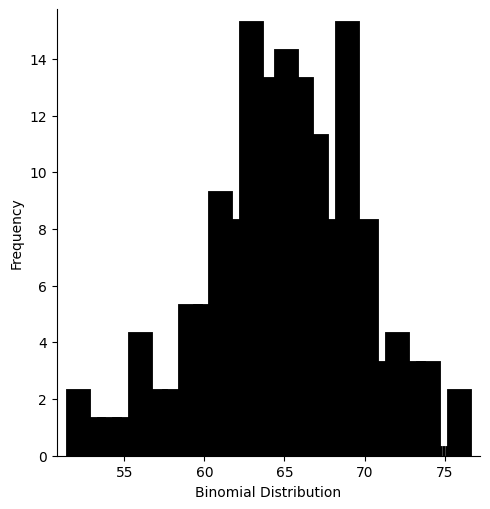

In [369]:
# Jika hanya terpenuhi kondisi 1, 3 maka 65%

Binomial_4 = df[(df['SALE PRICE'] >= 150_000) & (df['SALE PRICE'] <= 250_000) &
                (df['BOROUGH'] == 'MANHATTAN')].reset_index()
n_percoaan_4 = len(Binomial_4)
peluang_4 = 0.65

Visualisasi_Binomial(peluang_4, n_percoaan_4)
Binomial_4.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
451,15986,MANHATTAN,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1169,1223,,R4,221 WEST 77TH STREET,15 FL,10024,1,0,1,-,-,2015,2,R4,10182500.0,2017-08-14 00:00:00
452,16466,MANHATTAN,UPPER WEST SIDE (59-79),46 CONDO STORE BUILDINGS,4,1168,1301,,RK,210 WEST 77TH STREET,CUA,10024,0,0,1,-,-,2015,4,RK,3900000.0,2017-07-12 00:00:00


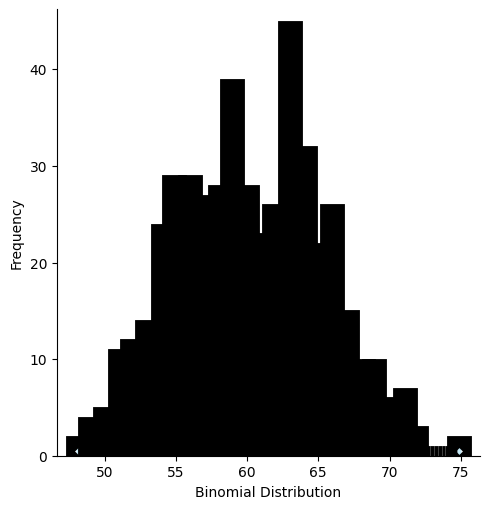

In [370]:
# Jika hanya terpenuhi kondisi 2, 3 maka 60%

Binomial_5 = df[(df['YEAR BUILT'] >= 2014) &
                (df['BOROUGH'] == 'MANHATTAN')].reset_index()
n_percoaan_5 = len(Binomial_5)
peluang_5 = 0.60

Visualisasi_Binomial(peluang_5, n_percoaan_5)
Binomial_5.tail(2)

### Bernoulli Distribution

Misalnya, ada tiga kondisi yang perlu dipenuhi untuk memutuskan pembelian properti, dan masing-masing memiliki probabilitas keberhasilan yang berbeda. Bagaimana kita dapat menghitung probabilitas keseluruhan bahwa properti akan dibeli berdasarkan probabilitas masing-masing kondisi?
jika jumlah karyawan yang membantu survei lapangan mencari kesesuain keinginan pembeli ada sebanyak 1.
Kondisi Pembelian:

    Membeli jika harga properti lebih dari $150.000 dan kurang dari $250.000 (Probabilitas = 30%)
    Membeli jika tahun pembangunan (YEAR BUILT) lebih besar dari 2014 (Probabilitas = 25%)
    Membeli jika properti berlokasi di wilayah MANHATTAN (Probabilitas = 35%)


Note : Berdasar google harga rumah minimum/ standar berada $50000, berarti dibawah itu kemungkinan terjadi error/salah input atau scam. jadi minimum di set $50000

In [359]:
def Visualisasi_Bernoulli(peluang, size_percobaan):
    Bernoulli = bernoulli.rvs(p=peluang,
                              size=size_percobaan)

    ax = sns.displot(Bernoulli,
                     kde=False,
                     color='skyblue',
                     alpha=0.5,
                     linewidth=15)
    ax.set(xlabel='Bernoulli Distribution',
           ylabel='Frequency')
    plt.grid()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4701,8342,STATEN ISLAND,WOODROW,01 ONE FAMILY DWELLINGS,1,7106,249,,A5,77 LORRAINE LOOP,,10309,1,0,1,1111,1050,1990,1,A5,162000.0,2017-08-16 00:00:00
4702,8402,STATEN ISLAND,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,244,,B2,19 SPRUCE LANE,,10309,2,0,2,3800,2700,1996,1,B2,168000.0,2017-01-19 00:00:00


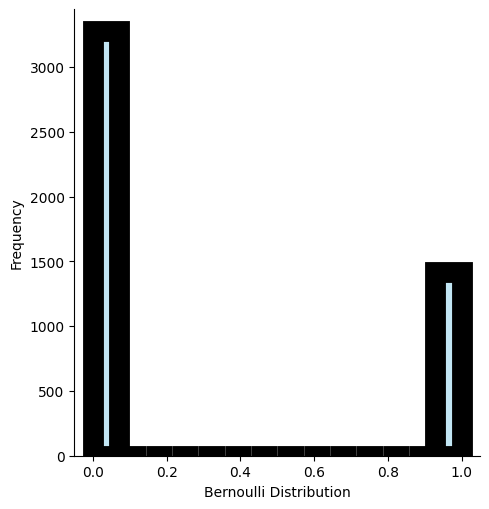

In [349]:
# Jika hanya terpenuhi kondisi 1 maka 30%

Bernoulli_1 = df[(df['SALE PRICE'] >= 150_000) & (df['SALE PRICE'] <= 250_000)]
n_percoaan_1 = len(Binomial_1)
peluang_1 = 0.30

Visualisasi_Bernoulli(peluang_1, n_percoaan_1)
Binomial_1.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
37,5843,STATEN ISLAND,PRINCES BAY,02 TWO FAMILY DWELLINGS,1,6979,64,,B9,97 SANTA MONICA LANE,,10309,2,0,2,2968,1760,2015,1,B9,150000.0,2017-08-09 00:00:00
38,5844,STATEN ISLAND,PRINCES BAY,02 TWO FAMILY DWELLINGS,1,6979,66,,B9,99 SANTA MONICA LANE,,10309,2,0,2,2968,1800,2015,1,B9,150000.0,2017-07-27 00:00:00


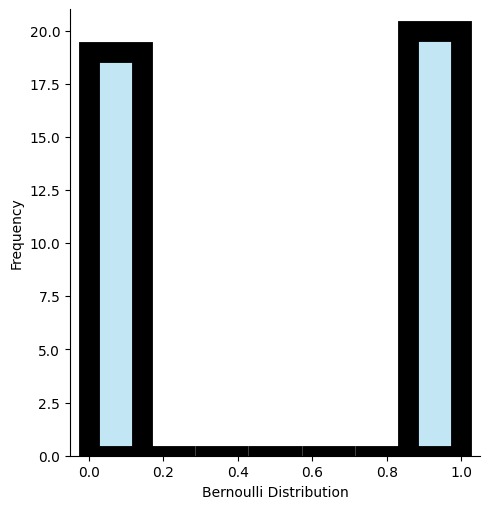

In [350]:
# Jika hanya terpenuhi kondisi 1, 2 maka 55%

Bernoulli_2 = df[(df['SALE PRICE'] >= 150_000) & (
    df['SALE PRICE'] <= 250_000) & (df['YEAR BUILT'] >= 2014)].reset_index()
n_percoaan_2 = len(Binomial_2)
peluang_2 = 0.55

Visualisasi_Bernoulli(peluang_2, n_percoaan_2)
Binomial_2.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


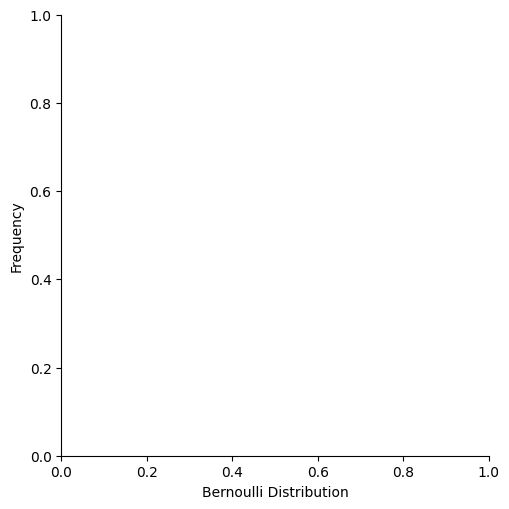

In [351]:
# Jika hanya terpenuhi kondisi 1, 2, 3 maka 90%

Bernoulli_3 = df[(df['SALE PRICE'] >= 150_000) & (df['SALE PRICE'] <= 250_000) &
                 (df['YEAR BUILT'] >= 2014) &
                 (df['BOROUGH'] == 'MANHATTAN')].reset_index()
n_percoaan_3 = len(Binomial_3)
peluang_3 = 0.90

Visualisasi_Bernoulli(peluang_3, n_percoaan_3)
Binomial_3.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
150,18234,MANHATTAN,WASHINGTON HEIGHTS UPPER,10 COOPS - ELEVATOR APARTMENTS,2,2180,614,,D4,"720 FORT WASHINGTON AVEN, 4M",,10040,0,0,0,-,-,1939,2,D4,238000.0,2017-08-18 00:00:00
151,18263,MANHATTAN,WASHINGTON HEIGHTS UPPER,10 COOPS - ELEVATOR APARTMENTS,2,2246,120,,D4,"1803 RIVERSIDE DRIVE, 4L",,10034,0,0,0,-,-,1920,2,D4,250000.0,2017-02-28 00:00:00


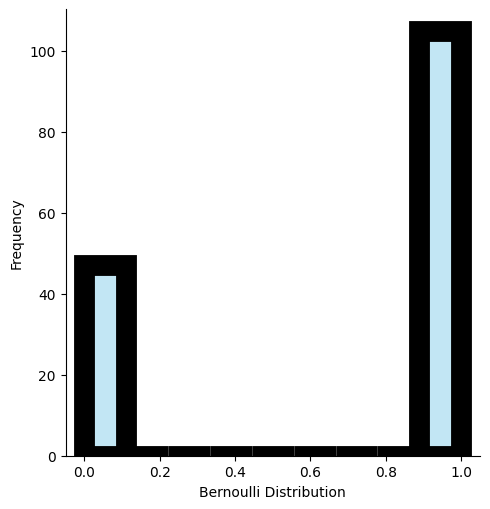

In [352]:
# Jika hanya terpenuhi kondisi 1, 3 maka 65%

Bernoulli_4 = df[(df['SALE PRICE'] >= 150_000) & (df['SALE PRICE'] <= 250_000) &
                 (df['BOROUGH'] == 'MANHATTAN')].reset_index()
n_percoaan_4 = len(Binomial_4)
peluang_4 = 0.65

Visualisasi_Bernoulli(peluang_4, n_percoaan_4)
Binomial_4.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
451,15986,MANHATTAN,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1169,1223,,R4,221 WEST 77TH STREET,15 FL,10024,1,0,1,-,-,2015,2,R4,10182500.0,2017-08-14 00:00:00
452,16466,MANHATTAN,UPPER WEST SIDE (59-79),46 CONDO STORE BUILDINGS,4,1168,1301,,RK,210 WEST 77TH STREET,CUA,10024,0,0,1,-,-,2015,4,RK,3900000.0,2017-07-12 00:00:00


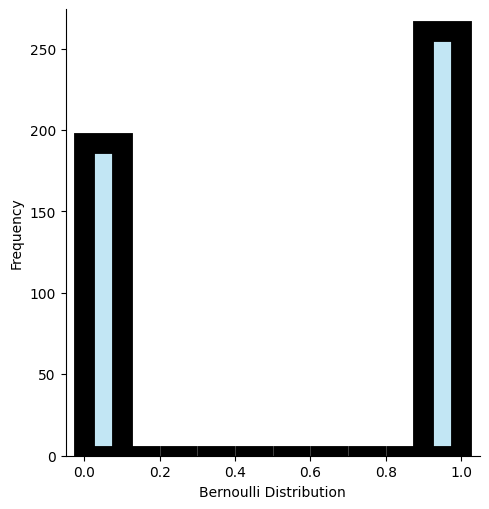

In [353]:
# Jika hanya terpenuhi kondisi 2, 3 maka 60%
Bernoulli_5 = df[(df['YEAR BUILT'] >= 2014) &
                 (df['BOROUGH'] == 'MANHATTAN')].reset_index()
n_percoaan_5 = len(Binomial_5)
peluang_5 = 0.60

Visualisasi_Bernoulli(peluang_5, n_percoaan_5)
Binomial_5.tail(2)

## Confidence Intervals

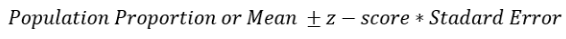

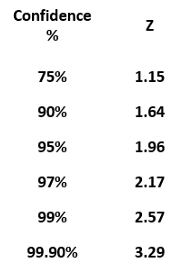

### Persiapan

In [354]:
df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

In [355]:
# Set minimum SALE PRICE >= 50,000 dan hanya berada antara 'MANHATTAN' atau 'BRONX'
temp_CI = df[(df['SALE PRICE'] >= 50_000) &
             ((df['BOROUGH'] == 'MANHATTAN') | (df['BOROUGH'] == 'BRONX'))]

mean_sale_price = temp_CI['SALE PRICE'].mean()

# Membuat kolom 'EXPENSIVE_CHEAP' dengan 1 untuk Mahal dan 0 untuk Murah
temp_CI['EXPENSIVE CHEAP'] = temp_CI['SALE PRICE'].apply(
    lambda x: 1 if x >= mean_sale_price else 0)

# Menampilkan DataFrame
temp_CI.reset_index(drop=True)

C:\Users\Ahmad Fadillah\AppData\Local\Temp\ipykernel_10112\477147606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CI['EXPENSIVE CHEAP'] = temp_CI['SALE PRICE'].apply(


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,EXPENSIVE CHEAP
0,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00,1
1,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00,1
2,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00,1
3,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23 00:00:00,1
4,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19032,BRONX,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2B",,10470,0,0,0,0,0,1957,2,D4,110000.0,2017-01-04 00:00:00,0
19033,BRONX,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 4H",,10470,0,0,0,0,0,1957,2,D4,205000.0,2017-03-01 00:00:00,0
19034,BRONX,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1A",,10470,0,0,0,0,0,1957,2,D4,117000.0,2017-08-01 00:00:00,0
19035,BRONX,WOODLAWN,22 STORE BUILDINGS,4,3365,79,,K9,63 EAST 233RD STREET,,10470,1,1,2,10269,4228,1931,4,K9,1085250.0,2017-04-17 00:00:00,0


In [266]:
temp_CI['EXPENSIVE CHEAP'].value_counts()

EXPENSIVE CHEAP
0    15603
1     3434
Name: count, dtype: int64

In [267]:
temp_CI['BOROUGH'].value_counts()

BOROUGH
MANHATTAN    14128
BRONX         4909
Name: count, dtype: int64

### Manual Menggunakan Population Proportion

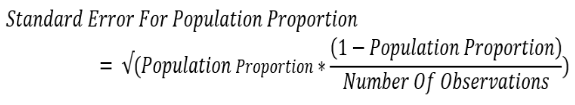

In [269]:
pd.crosstab(temp_CI['EXPENSIVE CHEAP'],
            temp_CI['BOROUGH'])

BOROUGH,BRONX,MANHATTAN
EXPENSIVE CHEAP,,
0,4700,10903
1,209,3225


In [270]:
Population_Propotion_BRONX = 209 / (209 + 4700)
Number_Of_Observations_BRONX = 4700 + 209
Standard_Error_For_Population_Proportion_BRONX = np.sqrt(Population_Propotion_BRONX *
                                                         ((1 - Population_Propotion_BRONX) / Number_Of_Observations_BRONX))
z_score_BRONX = 1.96

print(
    f'Standard Error For Population Proportion BRONX : {Standard_Error_For_Population_Proportion_BRONX}')

Standard Error For Population Proportion BRONX : 0.0028815922262806597


In [271]:
Lower_BRONX = Population_Propotion_BRONX - z_score_BRONX * \
    Standard_Error_For_Population_Proportion_BRONX
Higher_BRONX = Population_Propotion_BRONX + z_score_BRONX * \
    Standard_Error_For_Population_Proportion_BRONX


print(f'Lower : {Lower_BRONX}')
print(f'Higer : {Higher_BRONX}')

Lower : 0.036926941733943563
Higer : 0.048222783260963756


### Manual Menggunakan Mean

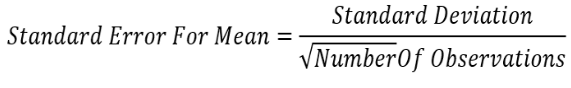

In [272]:
temp_CI.groupby('BOROUGH').agg({'EXPENSIVE CHEAP': [np.mean, np.std, np.size]})

EXPENSIVE CHEAP                 
                     mean       std   size
BOROUGH                                   
BRONX            0.042575  0.201917   4909
MANHATTAN        0.228270  0.419732  14128

In [273]:
Mean_BRONX_1 = 0.042575
Standard_Deviation_BRONX_1 = 0.201917
Number_Of_Observations_BRONX_1 = 4909
z_score_BRONX = 1.96


Standard_Error_For_Mean = Standard_Deviation_BRONX_1 / \
    np.sqrt(Number_Of_Observations_BRONX_1)
print(f'Standard Error For Mean BRONX : {Standard_Error_For_Mean }')

Standard Error For Mean BRONX : 0.0028818831582116634


In [274]:
Lower_BRONX = Mean_BRONX_1 - z_score_BRONX * Standard_Error_For_Mean
Higher_BRONX = Mean_BRONX_1 + z_score_BRONX * Standard_Error_For_Mean


print(f'Lower : {Lower_BRONX}')
print(f'Higer : {Higher_BRONX}')

Lower : 0.03692650900990514
Higer : 0.04822349099009486


### Dengan Library statsmodels.api

In [275]:
sm.stats.proportion_confint(Number_Of_Observations_BRONX * Population_Propotion_BRONX,
                            Number_Of_Observations_BRONX)

(0.036927045515812974, 0.048222679479094345)

## Hypothesis Testing

Hipotesis : Harga rumah di tahun 2013-2016 di dominasi harga rumah yang lebih mahal 60%

In [324]:
Hypothesis_Testing = df[(df['SALE PRICE'] >= 50_000) &
                        (df['YEAR BUILT'] >= 2013) & (df['YEAR BUILT'] <= 2016)].reset_index()

# Membuat kolom 'EXPENSIVE_CHEAP' dengan 1 untuk Mahal dan 0 untuk Murah
Hypothesis_Testing['EXPENSIVE CHEAP'] = Hypothesis_Testing['SALE PRICE'].apply(
    lambda x: 1 if x >= 700_000 else 0)

Hypothesis_Testing.reset_index(drop=True)

Hypothesis_Testing.tail(2)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,EXPENSIVE CHEAP
3364,8247,STATEN ISLAND,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,1965,1121,,R3,1235 FOREST HILL ROAD,2K,10314,1,0,1,-,-,2015,1,R3,420810.0,2017-04-11 00:00:00,0
3365,8248,STATEN ISLAND,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,1965,1122,,R3,1235 FOREST HILL ROAD,2L,10314,1,0,1,-,-,2015,1,R3,430950.0,2017-06-01 00:00:00,0


In [325]:
Hypothesis_Testing['EXPENSIVE CHEAP'].value_counts()

EXPENSIVE CHEAP
1    2310
0    1056
Name: count, dtype: int64

In [335]:
Standard_Error_of_Estimate = np.sqrt(0.6 * (1-0.60) / len(Hypothesis_Testing))
print('Standard Error : ', Standard_Error_of_Estimate)

Standard Error :  0.008444006618414981


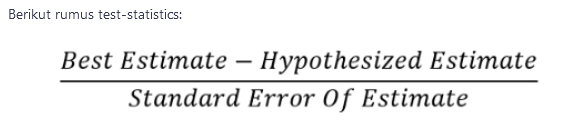

In [336]:
# Best Estimate Output : 0.6862745098039216
Best_Estimate = len(
    Hypothesis_Testing[Hypothesis_Testing['EXPENSIVE CHEAP'] == 1]) / len(Hypothesis_Testing)

print('Hipotesis harga rumah mahal : ', np.round(
    Best_Estimate, decimals=2) * 100, '%')

# Hypothesized Estimate
Hypothesized_Estimate = 0.60

# Standard Error of Estimate Output : 0.6862745098039216
Standard_Error_of_Estimate = np.sqrt(
    0.6 * (1 - 0.60) / len(Hypothesis_Testing))
print('Standard Error : ', Standard_Error_of_Estimate)

# Result rumus Output : -70.37004118415814
test_stat = (Best_Estimate - Hypothesized_Estimate) / \
    Standard_Error_of_Estimate
print('Result test-statistics : ', test_stat)

Hipotesis harga rumah mahal :  69.0 %
Standard Error :  0.008444006618414981
Result test-statistics :  10.21724800828213


In [337]:
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
pvalue

1.65986314941064e-24

Kesimpulan : Semakin kecil nilai pvalue berarti akan semakin kuat menolak null hipotesis. biasanya batas tingkat signifikansi menggunakan α=0.05 atau α=0.001. karena hasil nilai dari pvalue : 1.65986314941064e-24, yang sangat kecil dari tingkat signifikansi sebesar 0.05 ataupun 0.01 sehingga dapat disimpulkan bahwa ada perbedaan signifikan antara data yang di amati dengan nilai yang di hipotesiskan. Oleh karena itu Hipotesis Nol dapat DITOLAK

## Overall Analysis

In [363]:
pvalue

1.65986314941064e-24

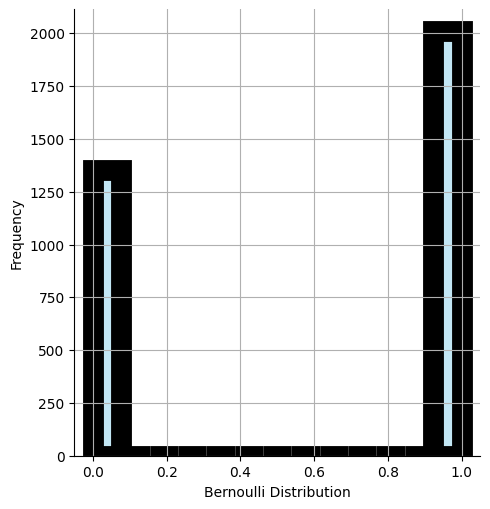

In [364]:
Visualisasi_Bernoulli(0.6, len(Hypothesis_Testing))

Dari hipotesis yang mengatakan bahwa 60% rumah lebih mahal pada tahun 2013-2016 ternyata tidak terlalu relevan karena pvalue yang lebih kecil dari tingkat signifikansi 5% sehingga null hypotesis ditolak. Dan dari visualisasi Bernuoli ternyata terdapat kurang lebih 2200 orang yang tetap membeli rumah. 